In [58]:
%config Completer.use_jedi = False

In [124]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
import matplotlib.animation as animation
from IPython import display

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section
from metpy.units import units

In [104]:
from netCDF4 import Dataset
import numpy as np
from tools import lonlat_to_xy
import metpy.calc as mpcalc
import datetime


In [113]:
e0 = datetime.date(1900,1,1)


with Dataset('/media/robbie/Brokendrive/E5/ERA_nh_1973_12.nc') as ERA5_data:
    t = np.array(ERA5_data['time'])
    dates = [e0 + datetime.timedelta(hours=int(h)) for h in t]
    lons = np.array(ERA5_data['longitude'])
    lats = np.array(ERA5_data['latitude'])
    v10 = np.array(ERA5_data['v10'])
    u10 = np.array(ERA5_data['u10'])

In [114]:
ERA5_lon_grid = np.array([np.array(lons), ] * 121)

ERA5_lat_grid = np.array([np.array(lats), ] * 1440).T

ERA_x_grid, ERA_y_grid = lonlat_to_xy(ERA5_lon_grid, ERA5_lat_grid,hemisphere='n')

dx, dy = mpcalc.lat_lon_grid_deltas(lons, lats)

In [115]:
u10 = u10* units.meter / units.second
v10 = v10* units.meter / units.second

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): hrs(248), x(121), y(1440)
    variables(dimensions): float32 vort_3hr(hrs,x,y), float32 vort_ave(x,y), float32 lon(x,y), float32 lat(x,y), int32 hrs_since_1900(hrs)
    groups: 



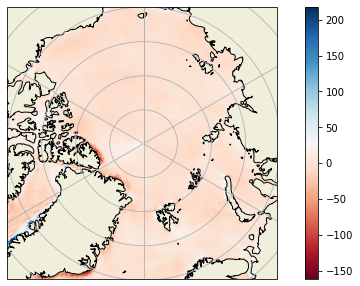

In [136]:

    
d = Dataset('/home/robbie/Dropbox/beaufort_sea/vorticity_files/197405.nc')

print(d)

vort = np.array(d['vort_ave'])

plot(lons, lats,
     vort,
#      color_scale=(-0.0002,0.0002),
     color_scheme='RdBu',
#      land=False
    )

In [132]:
hemisphere = 'n'

fig = plt.figure(figsize=(10,10))

if hemisphere == 'n':
    ax = plt.axes(projection=ccrs.NorthPolarStereo())
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())    
else:  
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -55], ccrs.PlateCarree())

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

ax.margins()

s = 4
scale = 200
size_lim = 20

bg = ax.pcolormesh(lons, 
                   lats, 
                   vort, 
                    vmin = -0.0002, 
                    vmax = 0.0002,
                    transform=ccrs.PlateCarree(),
                    cmap='PRGn',
                    alpha=1)

ann = ax.annotate('',
                  xy=(0.05,0.9),
                  xycoords='axes fraction',
                  fontsize=25,
                  ha='left')

ann.set_animated(True)
    
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)

########################################################

def animate(frame):
    
    if frame % 10 == 0: #Track progress
        print(frame)
        
    ann.set_text(f'{dates[frame]}')
    
    i = frame
    
    vort = np.array(mpcalc.vorticity(u10[i], v10[i], dx, dy))
    
    bg.set_array(vort.ravel())


#######################################################

ani = animation.FuncAnimation(fig,
                              animate,
                             frames= range(0,u10.shape[0]),                              
#                              frames= range(0,2),
                             )    

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

0
0


/home/robbie/anaconda3/lib/python3.7/site-packages/pint/quantity.py:1190: RuntimeWarning: invalid value encountered in true_divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240


In [118]:
Writer = animation.writers['ffmpeg']

writer = Writer(fps=10, metadata=dict(artist='Robbie Mallett CPOM UCL'))

ani.save('/home/robbie/Dropbox/beaufort_sea/vorticity.mp4', writer=writer)

0
0


/home/robbie/anaconda3/lib/python3.7/site-packages/pint/quantity.py:1190: RuntimeWarning: invalid value encountered in true_divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
